In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn import model_selection as ms


In [2]:
from transform import standardize, normalize
from resample import split_k_fold

In [3]:
df = pd.read_csv('data.csv', sep=';')
dataset = df.values

In [4]:
train, test = split_k_fold(n_elem=len(dataset),n_splits=5)
X = dataset[:, 0:11]
y = dataset[:, 11]

In [5]:
resultados = {}
resultados['SGDR'] = {'modelo' : SGDRegressor()}
resultados['LR'] = {'modelo': LinearRegression()}
resultados['LSVR'] = {'modelo': LinearSVR()}
resultados['SVR'] = {'modelo': SVR()}
resultados['RFR'] = {'modelo': RandomForestRegressor()}
resultados['GBR'] = {'modelo': GradientBoostingRegressor()}

In [6]:
x_norm = normalize(X)
x_std = standardize(X)

In [7]:
for x in resultados:
    print('processando {}...'.format(x))
    resultados[x]['mse_norm'] = ms.cross_val_score(resultados[x]['modelo'], x_norm, y, cv=zip(train, test)).mean()
    resultados[x]['mse_std'] = ms.cross_val_score(resultados[x]['modelo'], x_std, y, cv=zip(train, test)).mean()

processando ...
processando ...
processando ...


/home/igor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/igor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/igor/miniconda

processando ...
processando ...
processando ...


In [9]:
df = pd.DataFrame(resultados)
df_T = df.T[['mse_norm', 'mse_std']]
df_T

,mse_norm,mse_std
GBR,0.399301,0.399193
LR,0.339527,0.339527
LSVR,0.325891,0.321364
RFR,0.427005,0.428278
SGDR,0.0420335,-0.146765
SVR,0.336642,0.388783


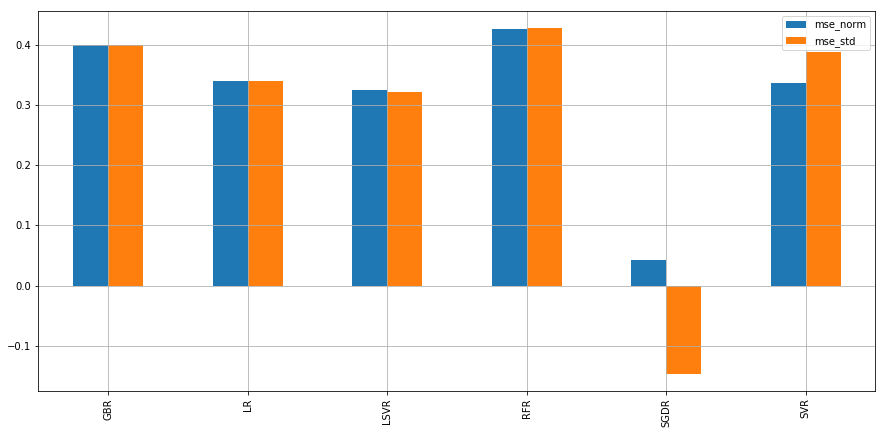

In [10]:
df_T.plot(kind='bar', grid=True, figsize=(15, 7));

In [11]:
best_model = SGDRegressor()
best_model.fit(x_norm, y);

/home/igor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### Linear Regression 